## Python Final Project
### Kartik, Sahil and Manisha

In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib.dates import MonthLocator, DateFormatter

**Loading COVID19 datasets**

In [2]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(death_cases_url)

In [3]:
cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [4]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [5]:
deaths['Province/State'].isna().sum(), cases['Province/State'].isna().sum()

(198, 198)

The ``Province/State`` column does not look very good, with 198 ``NaN`` values out of 289, in both of the dataframes. However, we can not remove those rows altogether as they might be very useful for more specific further analysis.
</b>
Let us now have a bigger picture of the dataset by aggregating deaths and cases over all countries.

In [6]:
global_summed = pd.DataFrame([cases.iloc[:,4: ].sum(axis=0), deaths.iloc[:,4: ].sum(axis=0)], index=['cases', 'deaths'])
global_summed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
cases,557,657,944,1437,2120,2929,5580,6169,8237,9927,...,675322238,675542852,675731911,675914580,675968775,676024901,676082941,676213378,676392824,676570149
deaths,17,18,26,42,56,82,131,133,172,214,...,6872682,6874463,6876031,6877325,6877601,6877749,6878115,6879038,6880483,6881802


The dataset is in what is called the "wide" form, let us tidy it up a little for better analysis.

In [7]:
covid = global_summed.transpose()
covid.index = pd.to_datetime(covid.index)
covid

,cases,deaths
2020-01-22,557,17
2020-01-23,657,18
2020-01-24,944,26
2020-01-25,1437,42
2020-01-26,2120,56
...,...,...
2023-03-05,676024901,6877749
2023-03-06,676082941,6878115
2023-03-07,676213378,6879038
2023-03-08,676392824,6880483


The dataset looks pretty apt, although minor cleaning might be required which we will carry out once the complete data has been extracted.

**Loading Stocks datasets**

Further, we will extract stock market prices for each of these dates, so as to analyse COVID19's effect on these prices. We use the following 5 stock indices for the categories listed in question.
1. Overall American Market: **NASDAQ**
2. Overall Canadian Market: **Toronto Stock Exchange**
3. Travel Sector: **AirBNB** (AlphaVantage did not seem to have an overall index for this sector, so we are using AirBNB for reference)
4. Real Estate Sector: **MSCI U.S. REIT Index**
5. Precious Metals: **S&P GSCI**

In [8]:
API_KEY = 'FH3KFFPOMYNI13R9'
START_DATE = covid.index[0].strftime('%Y-%m-%d')
END_DATE = covid.index[-1].strftime('%Y-%m-%d')
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={sym}&outputsize=full&apikey={key}&datatype=csv'

In [9]:

def conv_hi_lo(df):
    df.index = pd.to_datetime(df['timestamp'])
    return df[(df.index>START_DATE) & (df.index<END_DATE)].loc[:, ['high', 'low']]

In [10]:
nasdaq_data = conv_hi_lo(pd.read_csv(url.format(key=API_KEY, sym='NDAQ')))
tsx_data = conv_hi_lo(pd.read_csv(url.format(key=API_KEY, sym='TSE')))
realest_data = conv_hi_lo(pd.read_csv(url.format(key=API_KEY, sym='MSCI')))
metals_data = conv_hi_lo(pd.read_csv(url.format(key=API_KEY, sym='S&PGSCI')))
travel_data = conv_hi_lo(pd.read_csv(url.format(key=API_KEY, sym='ABNB')))

In [11]:
nasdaq_data

,high,low
timestamp,,
2023-03-08,55.395,54.82
2023-03-07,56.215,54.95
2023-03-06,56.710,55.96
2023-03-03,56.325,55.80
2023-03-02,56.110,55.06
...,...,...
2020-01-29,115.770,109.76
2020-01-28,111.590,109.80
2020-01-27,110.280,109.00


Finally, we have all the stocks datasets with desired columns of daily low and daily high within the date ranges which are in the ``covid`` dataframe.
However, there appears to be a minor problem with the ``covid`` dataframe itself, the ``deaths`` and ``cases`` are commulative numbers. We want them to be daily numbers.
Let's create new columns for non-commulative stats.

In [12]:
covid.rename({'deaths':'commulative_deaths', 'cases':'commulative_cases'}, axis=1, inplace=True)
covid['cases'], covid['deaths'] = covid['commulative_cases'].diff(), covid['commulative_deaths'].diff()
covid = covid.fillna(0)
covid

,commulative_cases,commulative_deaths,cases,deaths
2020-01-22,557,17,0.0,0.0
2020-01-23,657,18,100.0,1.0
2020-01-24,944,26,287.0,8.0
2020-01-25,1437,42,493.0,16.0
2020-01-26,2120,56,683.0,14.0
...,...,...,...,...
2023-03-05,676024901,6877749,56126.0,148.0
2023-03-06,676082941,6878115,58040.0,366.0
2023-03-07,676213378,6879038,130437.0,923.0
2023-03-08,676392824,6880483,179446.0,1445.0


There appears to be another problem before merging the datasets, there are some dates missing from the datasets extracted from AlphaVantage. The sizes of ``covid`` and stock datasets do not match.
We are going to ``reindex()`` the datasets from ``START_DATE`` to ``END_DATE`` and interpolate the missing dates with stocks of previous date

In [13]:
len(nasdaq_data)==len(covid)

False

In [14]:
nasdaq_data.rename({'high':'nasdaq_high', 'low':'nasdaq_low'}, axis=1, inplace=True)
travel_data.rename({'high':'travel_high', 'low':'travel_low'}, axis=1, inplace=True)
metals_data.rename({'high':'metals_high', 'low':'metals_low'}, axis=1, inplace=True)
tsx_data.rename({'high':'tsx_high', 'low':'tsx_low'}, axis=1, inplace=True)
realest_data.rename({'high':'realest_high', 'low':'realest_low'}, axis=1, inplace=True)

In [15]:
nasdaq_data = nasdaq_data.reindex(pd.date_range(START_DATE, END_DATE, freq='D')).fillna(method='ffill')
travel_data = travel_data.reindex(pd.date_range(START_DATE, END_DATE, freq='D')).fillna(method='ffill')
tsx_data = tsx_data.reindex(pd.date_range(START_DATE, END_DATE, freq='D')).fillna(method='ffill')
metals_data = metals_data.reindex(pd.date_range(START_DATE, END_DATE, freq='D')).fillna(method='ffill')
realest_data = realest_data.reindex(pd.date_range(START_DATE, END_DATE, freq='D')).fillna(method='ffill')

In [16]:
len(nasdaq_data)==len(covid)

True

Perfect! Let us finally go ahead and merge all the datasets.

In [17]:
full_data = pd.concat([covid, nasdaq_data, tsx_data, travel_data, metals_data, realest_data], axis=1)
full_data

,commulative_cases,commulative_deaths,cases,deaths,nasdaq_high,nasdaq_low,tsx_high,tsx_low,travel_high,travel_low,metals_high,metals_low,realest_high,realest_low
2020-01-22,557,17,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,657,18,100.0,1.0,109.680,108.48,34.07,32.2000,NaN,NaN,NaN,NaN,280.110,276.21
2020-01-24,944,26,287.0,8.0,110.290,109.24,33.92,32.3900,NaN,NaN,NaN,NaN,281.000,274.23
2020-01-25,1437,42,493.0,16.0,110.290,109.24,33.92,32.3900,NaN,NaN,NaN,NaN,281.000,274.23
2020-01-26,2120,56,683.0,14.0,110.290,109.24,33.92,32.3900,NaN,NaN,NaN,NaN,281.000,274.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,676024901,6877749,56126.0,148.0,56.325,55.80,25.01,24.1500,125.8700,122.70,16.4900,15.71,537.280,520.53
2023-03-06,676082941,6878115,58040.0,366.0,56.710,55.96,24.93,23.4250,129.4399,125.28,16.6200,15.86,545.495,537.86
2023-03-07,676213378,6879038,130437.0,923.0,56.215,54.95,24.02,22.5425,130.8500,125.50,16.4766,15.54,547.915,531.48
2023-03-08,676392824,6880483,179446.0,1445.0,55.395,54.82,22.96,22.4600,127.6600,124.74,15.9100,15.09,537.820,527.48


In [20]:
full_data.isna().sum().sort_values(ascending=False)

metals_high           525
metals_low            525
travel_high           323
travel_low            323
nasdaq_high             1
nasdaq_low              1
tsx_high                1
tsx_low                 1
realest_high            1
realest_low             1
commulative_cases       0
commulative_deaths      0
cases                   0
deaths                  0
dtype: int64

The *travel* and *metals* columns contain heavenly number of ``NaN``s. Unfortunately, they can not be eliminated straight away, because the AlphaVantage API could only extract these stocks for a limited number of consecutive dates.
But luckily, we do not need to deal with these missing values because our end goal is simply creating a time series graph. So we are deciding to keep these ``NaN``s as they are.

**VISUALIZATION**

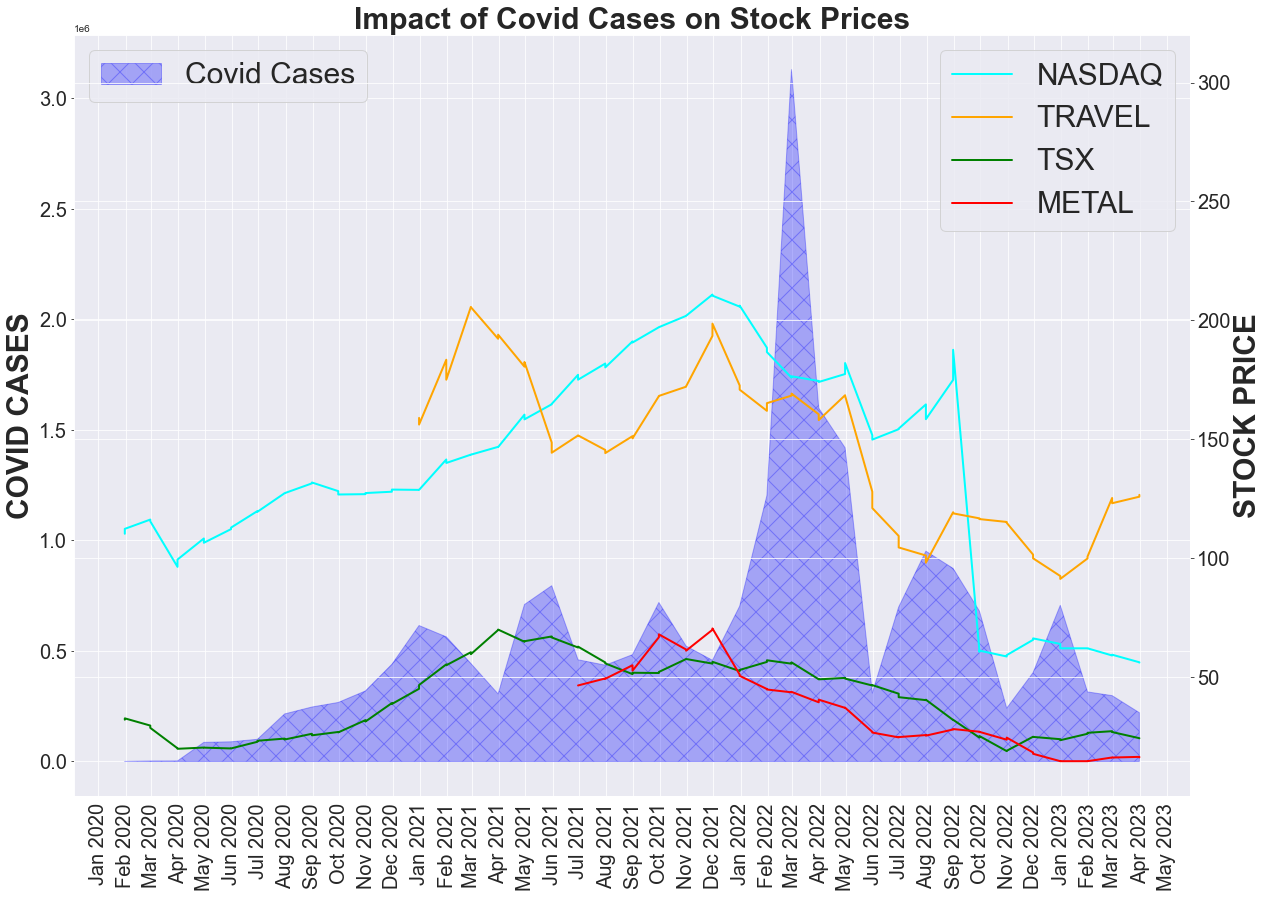

<Figure size 432x288 with 0 Axes>

In [24]:
cases_df = full_data[["cases","nasdaq_high", "travel_high", "tsx_high", "metals_high"]]
monthly_cases_df=cases_df.resample("M").first()
mean_data = cases_df.resample("M").mean()
median_data = cases_df.resample("M").median()
combines_df = pd.concat([median_data, mean_data])
combines_df= combines_df.sort_index()


fix, ax = plt.subplots(figsize = (20,14))
ax.fill_between(monthly_cases_df.index, 0, monthly_cases_df["cases"], alpha=0.3, color="blue", hatch="x", label="Covid Cases")

ax.set_ylabel("COVID CASES", fontsize=30, fontweight="bold")
ax.tick_params(axis="y", labelsize=20)

ax.legend(loc="upper left", fontsize=30)
ax2 = ax.twinx()
ax2.plot(combines_df.index, combines_df.nasdaq_high, label="NASDAQ", color="cyan", linewidth=2)
ax2.plot(combines_df.index, combines_df.travel_high, label="TRAVEL", color="orange", linewidth=2)
ax2.plot(combines_df.index, combines_df.tsx_high, label="TSX", color="green", linewidth=2)
ax2.plot(combines_df.index, combines_df.metals_high, label="METAL", color="red", linewidth=2)

ax2.set_ylim([0,320])
ax2.set_ylabel("STOCK PRICE", fontsize=30, fontweight="bold")
ax2.set_yticks([50, 100, 150, 200, 250, 300])
ax2.tick_params(axis="y", labelsize=20)
ax2.legend(loc="upper right", fontsize=30)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.tick_params(axis="x", labelsize=20, rotation=90)

plt.title("Impact of Covid Cases on Stock Prices", fontsize=30, fontweight="bold")
plt.show()
plt.savefig("figures/impact_on_stockPrice.jpg")

The first chart we create is an **area chart** of total ``cases`` with **line graphs** representing stock prices for 4 major stocks on a secondary axis.
It is interesting, and simultaneously obvious, that the number of cases has a gradual increase till mid-2022. Consequently, the stock prices begin dropping about at the same time.
Particularly, the American market was affected the most, depicting a disastrous downfall after the peak cases.
However, the travel sector has began recovering the post-pandemic effects, unlike all other sectors.

We have only included four sectors, leaving out the **real estate** sector. This is because the real estate stock prices were relatively higher than the rest, so we decided to plot it in a separate chart below. But, before that, let us have a look at only the cases and deaths over the three years.

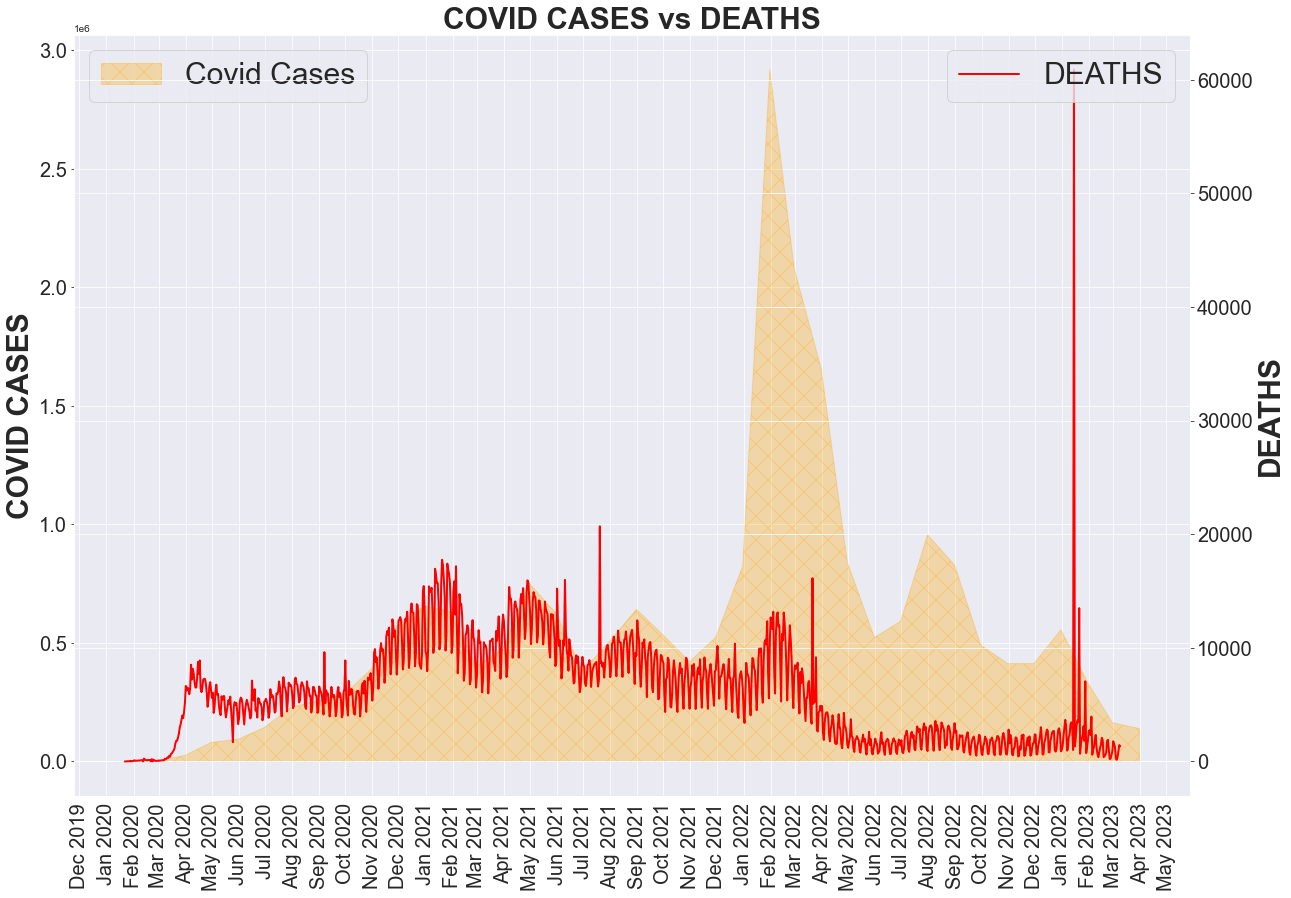

In [55]:
full_data = pd.read_csv("full_data.csv")
full_data.index = pd.to_datetime(full_data["Unnamed: 0"])
full_data.drop("Unnamed: 0", axis=1, inplace=True)

cases_df = full_data[["cases","deaths"]]
monthly_cases_df=cases_df.resample("M").mean()

fix, ax = plt.subplots(figsize = (20,14))
ax.fill_between(monthly_cases_df.index, 0, monthly_cases_df["cases"], alpha=0.3, color="orange", hatch="x", label="Covid Cases")

ax.set_ylabel("COVID CASES", fontsize=30, fontweight="bold")
ax.tick_params(axis="y", labelsize=20)

ax.legend(loc="upper left", fontsize=30)
ax2 = ax.twinx()
ax2.plot(cases_df.index, cases_df.deaths, label="DEATHS", color="red", linewidth=2)

ax2.set_ylabel("DEATHS", fontsize=30, fontweight="bold")
ax2.tick_params(axis="y", labelsize=20)
ax2.legend(loc="upper right", fontsize=30)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.tick_params(axis="x", labelsize=20, rotation=90)

plt.title("COVID CASES vs DEATHS", fontsize=30, fontweight="bold")
plt.show()
plt.savefig("figures/cases_vs_deaths.jpg")

Finally, let us visualize the ``realest`` prices solely using a **Gantt Chart**.

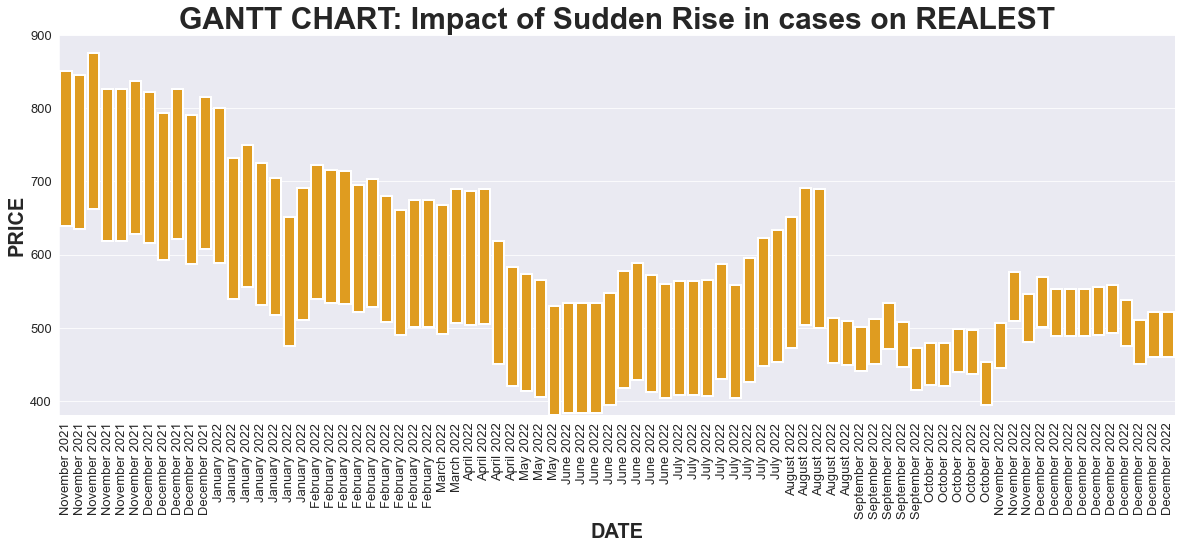

In [56]:
full_data = pd.read_csv("full_data.csv")
full_data.index = pd.to_datetime(full_data["Unnamed: 0"])
full_data.drop("Unnamed: 0", axis=1, inplace=True)

recent_data = full_data[(full_data.index>'2021-11-01')&(full_data.index<'2022-12-31')]
recent_data = recent_data.sample(80).sort_index()

fix, ax = plt.subplots(figsize = (20,7))
ax.tick_params(axis="y", labelsize=20)
sns.barplot(x=recent_data.index, y=recent_data.nasdaq_high, bottom=recent_data['realest_low'],  color="orange", linewidth=2, ax=ax)

ax.tick_params(axis="x", labelsize=10, rotation=90)
ax.tick_params(axis="y", labelsize=13)

formatted_labe=recent_data.index.strftime('%B %Y')
ax.set_xticklabels(formatted_labe)
ax.tick_params(axis="x", labelsize=13)

plt.title("GANTT CHART: Impact of Sudden Rise in cases on REALEST", fontsize=30, fontweight="bold")
plt.ylabel("PRICE", fontsize=20, fontweight="bold")
plt.xlabel("DATE", fontsize=20, fontweight="bold")
plt.show()
plt.savefig("figures/gantt_real_est.jpg")

Clearly, despite being the most valuable sector, the **real estate** sector witnesses a similar dip after mid-2022, apparently due to sudden rise in cases.

In [36]:
recent_data = full_data[(full_data.index>'2020-01-01')&(full_data.index<'2020-06-01')]
recent_data

,commulative_cases,commulative_deaths,cases,deaths,nasdaq_high,nasdaq_low,tsx_high,tsx_low,travel_high,travel_low,metals_high,metals_low,realest_high,realest_low
Unnamed: 0,,,,,,,,,,,,,,
2020-01-22,557,17,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,657,18,100.0,1.0,109.68,108.48,34.07,32.20,NaN,NaN,NaN,NaN,280.11,276.21
2020-01-24,944,26,287.0,8.0,110.29,109.24,33.92,32.39,NaN,NaN,NaN,NaN,281.00,274.23
2020-01-25,1437,42,493.0,16.0,110.29,109.24,33.92,32.39,NaN,NaN,NaN,NaN,281.00,274.23
2020-01-26,2120,56,683.0,14.0,110.29,109.24,33.92,32.39,NaN,NaN,NaN,NaN,281.00,274.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,5703984,388449,102556.0,5220.0,117.99,114.22,23.48,22.24,NaN,NaN,NaN,NaN,330.01,311.08
2020-05-28,5823977,393440,119993.0,4991.0,117.65,115.57,23.20,20.50,NaN,NaN,NaN,NaN,328.50,313.62
2020-05-29,5945413,398596,121436.0,5156.0,118.83,115.70,21.06,20.10,NaN,NaN,NaN,NaN,331.51,322.84


In [41]:
kaam_ka_data = pd.DataFrame(recent_data['cases'])
kaam_ka_data['nasdaq'] = recent_data.loc[:, 'nasdaq_high'].diff()
kaam_ka_data['travel'] = recent_data.loc[:, 'travel_high'].diff()
kaam_ka_data['realest'] = recent_data.loc[:, 'realest_high'].diff()
kaam_ka_data['metals'] = recent_data.loc[:, 'metals_high'].diff()
kaam_ka_data['tsx'] = recent_data.loc[:, 'tsx_high'].diff()
kaam_ka_data

,cases,nasdaq,travel,realest,metals,tsx
Unnamed: 0,,,,,,
2020-01-22,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-23,100.0,NaN,NaN,NaN,NaN,NaN
2020-01-24,287.0,0.61,NaN,0.89,NaN,-0.150
2020-01-25,493.0,0.00,NaN,0.00,NaN,0.000
2020-01-26,683.0,0.00,NaN,0.00,NaN,0.000
...,...,...,...,...,...,...
2020-05-27,102556.0,-1.28,NaN,-16.17,NaN,1.428
2020-05-28,119993.0,-0.34,NaN,-1.51,NaN,-0.280
2020-05-29,121436.0,1.18,NaN,3.01,NaN,-2.140


In [42]:
kaam_ka_data.fillna(0, inplace=True)

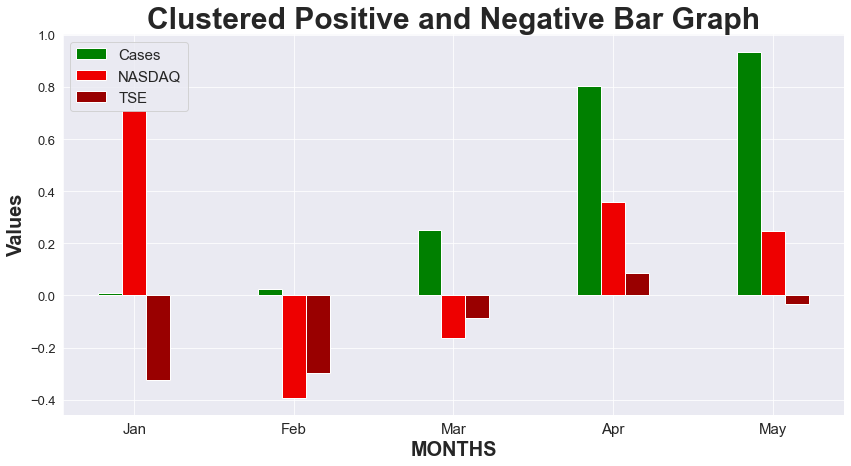

In [96]:
kaam_ka_data['date'] = kaam_ka_data.index
kaam_ka_data['month'] = kaam_ka_data['date'].dt.month
kaam_ka_data_gr = kaam_ka_data.groupby('month').mean()

x_values = kaam_ka_data_gr['cases']/100000
nasdaq = kaam_ka_data_gr['nasdaq']
travel = kaam_ka_data_gr['travel']
tsx = kaam_ka_data_gr['tsx']
metals = kaam_ka_data_gr['metals']

# Set the width of each bar
bar_width = 0.15

# Calculate the positions of the bars on the x-axis
x1 = np.arange(len(x_values))
x2 = [x + bar_width for x in x1]
x3 = [x + bar_width*2 for x in x1]

# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(x1, x_values, bar_width, color='green', label='Cases')
ax.bar(x2, nasdaq, bar_width, color='#ee0000', label='NASDAQ')
ax.bar(x3, tsx, bar_width, color='#990000', label='TSE')

# Displaying the chart
plt.show()

# Customizing the chart
ax.set_title('Clustered Positive and Negative Bar Graph', fontsize=30, fontweight="bold")
ax.set_xlabel('MONTHS', fontsize=20, fontweight="bold")
ax.set_ylabel('Values', fontsize=20, fontweight="bold")
xtick_locations = x1 + bar_width  # Positions of the xticks
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May']  # Custom xtick labels
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=13)

ax.legend(loc="upper left", fontsize=15)
plt.show()

### Summary
To conclude, it is evident from all the charts that all the major sectors have been hit drastically by the pandemic. Most of them are still struggling to recover from the effects. Exceptionally, the travel sector has began rising from the downfall lately.
Additionally, TSE stocks start declining as when the cases begin rising.